In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import copy

In [2]:
df_train_air = pd.read_csv("air_pollution__train.csv")
df_test_air = pd.read_csv("air_pollution_test.csv")

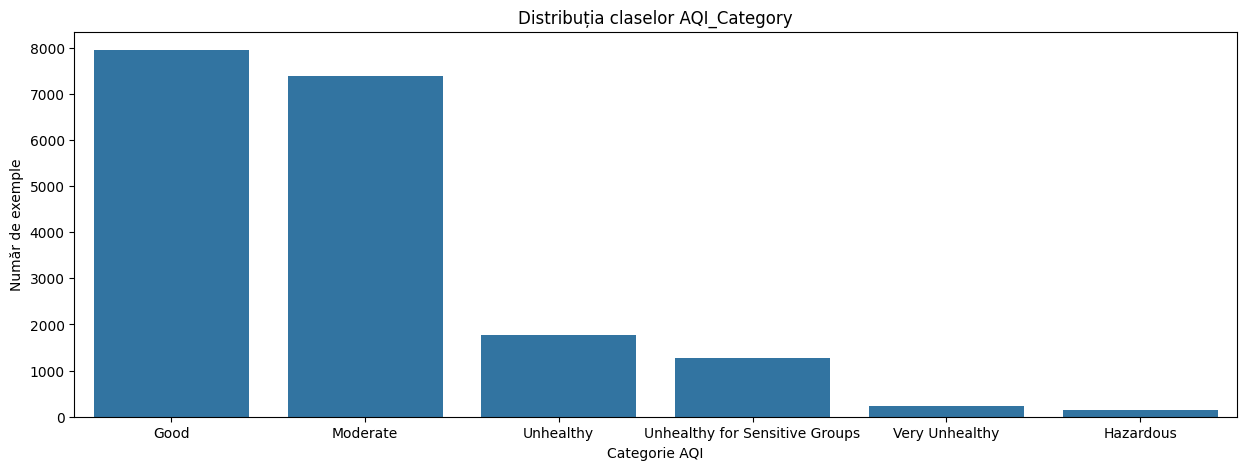

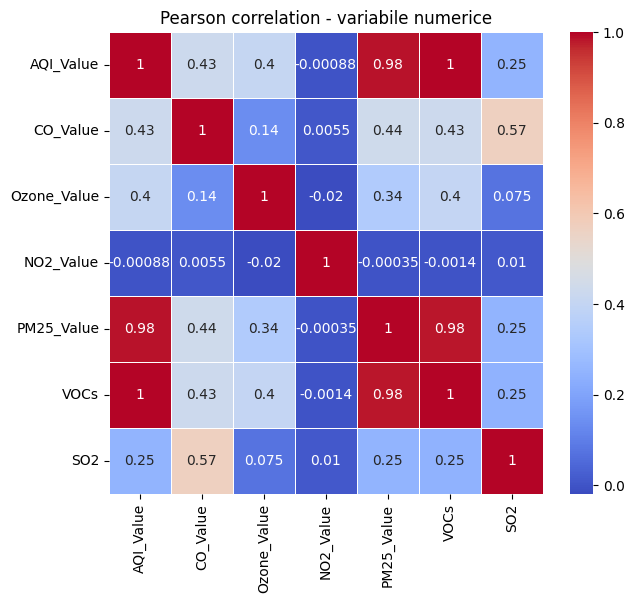

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


plt.figure(figsize=(15,5))
sns.countplot(x='AQI_Category', data=df_train_air,
              order=df_train_air['AQI_Category'].value_counts().index)
plt.title('Distribuția claselor AQI_Category')
plt.xlabel('Categorie AQI')
plt.ylabel('Număr de exemple')
plt.show()




numeric_cols = ['AQI_Value','CO_Value','Ozone_Value','NO2_Value','PM25_Value','VOCs','SO2']
corr = df_train_air[numeric_cols].corr(method='pearson')

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson correlation - variabile numerice')
plt.show()


Se observa o oarecare corelare ridicata intre NO si CO2, deoarece scalate, au cam aceleasi valori si sunt vraibile depedente intre ele


In [4]:
is_col_numeric = []
is_col_ordinal = []
is_col_discreet = []
for elements_cols in df_train_air.columns:
    if ".int" in str(type(df_test_air.at[0, elements_cols])) or "'int'" in str(type(df_test_air.at[0, elements_cols])) or "'float'" in str(type(df_test_air.at[0, elements_cols])) or ".float" in str(type(df_test_air.at[0, elements_cols])):
        is_col_numeric.append(elements_cols)
    elif df_test_air[elements_cols].nunique() < 20:
        is_col_ordinal.append(elements_cols)
    else:
        is_col_discreet.append(elements_cols)


In [5]:
avg_value_col = []
min_value_col = []
max_value_col = []
median_value_col = []
num_examples_without_empty_values = []
l_25th_percentile_val = []
l_75th_percentile_val = []

from prettytable import PrettyTable 
from statistics import stdev



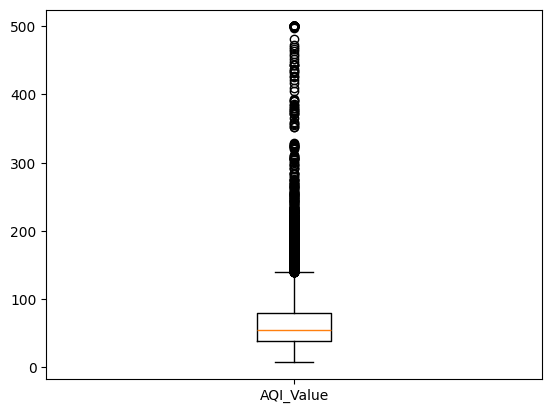

Not worth showing for column CO_Value


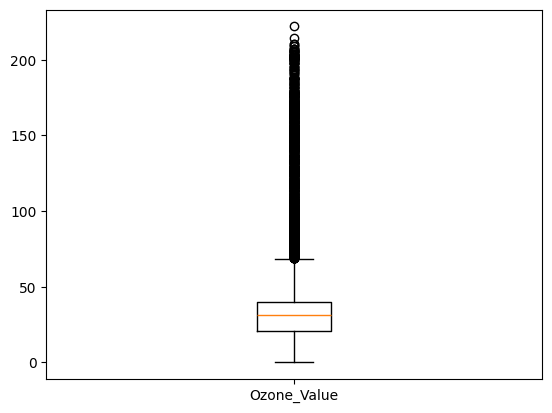

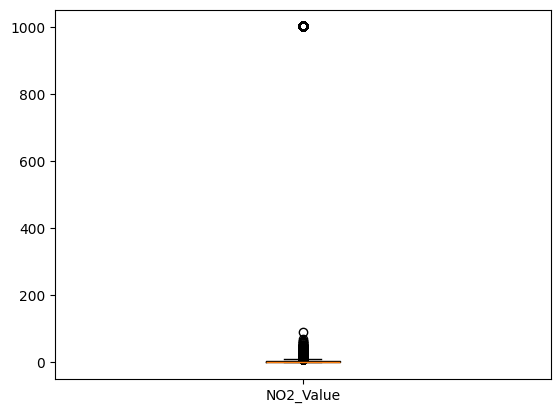

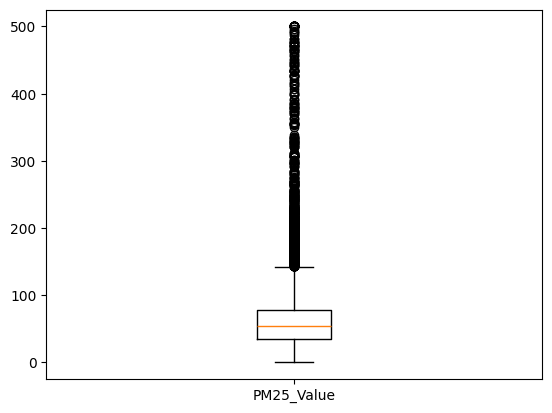

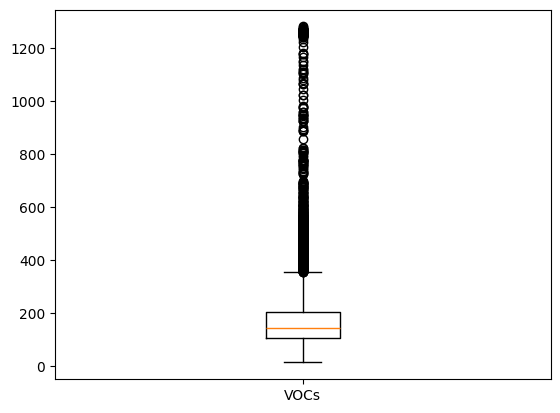

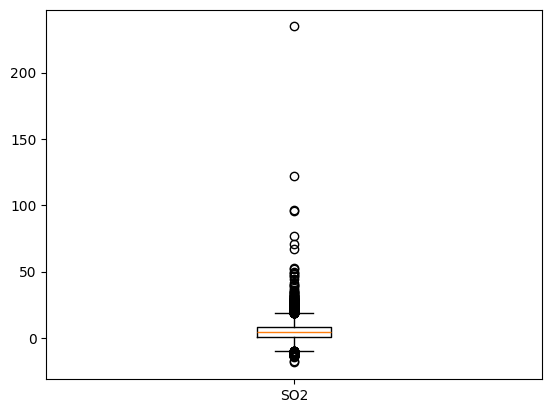

In [6]:
import math
import matplotlib.pyplot as plt
zz=0    
table_numeric = PrettyTable(["Column", "Number of non-nan values", "Average Value", "Standard Deviation", "Minimal Value", "Lower Whisker(25%)", "Median Value", "Upper Whisker(75%)",  "Maximum Value"]) 
for colons_num in is_col_numeric:

    zz+=1
    
    elements_mean_col = df_train_air[colons_num].copy().mean(skipna=True)
    avg_value_col.append(float(elements_mean_col))

    values_list = df_train_air[colons_num].copy().dropna()
    values_list = list(values_list)

    max_value_col.append(max(values_list))
    min_value_col.append(min(values_list))

    length_el = len(values_list)


    num_examples_without_empty_values.append(length_el)
    
    values_list.sort()


    val_25_th_percentile = -math.inf
    val_75_th_percentile = -math.inf

    median_value = -math.inf

    if length_el//4 != (int)(length_el/4):
        val_25_th_percentile = values_list[length_el//4+1]
        val_75_th_percentile = values_list[(length_el*3)//4+1]
    else:
        val_25_th_percentile = values_list[length_el//4]
        val_75_th_percentile = values_list[(length_el*3)//4]

    if length_el//2 != (int)(length_el/2):
        median_value = values_list[length_el//2+1]
    else:
        median_value = values_list[length_el//2]
    
    l_75th_percentile_val.append(val_75_th_percentile)
    l_25th_percentile_val.append(val_25_th_percentile)
    median_value_col.append(median_value)

    table_numeric.add_row([ colons_num, len(values_list), elements_mean_col, stdev(values_list), min(values_list), val_25_th_percentile, median_value, val_75_th_percentile, max(values_list)]) 




    if median_value == val_25_th_percentile and median_value == val_75_th_percentile:
        print(f"Not worth showing for column {colons_num}")
    else:
        plt.boxplot(df_train_air[colons_num].copy().dropna(), showfliers=True, tick_labels=[colons_num])
        plt.show()

    

In [7]:
print(table_numeric)

+-------------+--------------------------+--------------------+--------------------+---------------+--------------------+--------------+--------------------+---------------+
|    Column   | Number of non-nan values |   Average Value    | Standard Deviation | Minimal Value | Lower Whisker(25%) | Median Value | Upper Whisker(75%) | Maximum Value |
+-------------+--------------------------+--------------------+--------------------+---------------+--------------------+--------------+--------------------+---------------+
|  AQI_Value  |          18770           | 71.98172615876399  | 56.11072238917088  |       7       |         39         |      55      |         79         |      500      |
|   CO_Value  |          18770           | 1.3784762919552478 | 1.9327125289985534 |       0       |         1          |      1       |         1          |      133      |
| Ozone_Value |          16900           | 35.37278106508876  | 28.42240064996306  |      0.0      |        21.0        |     31.0

In [48]:
import math
import matplotlib.pyplot as plt
zz=0
from prettytable import PrettyTable

table_ord_n_cat = PrettyTable(["Column", "Number of non-nan values", "Total number of values per column", "Unique values"]) 
skip_column = []
for colons_num in list(df_train_air.columns):
    dict_category = {}
    for el in df_train_air[colons_num].dropna():
        if el not in dict_category.keys():
            dict_category[el] = 1
        else:
            dict_category[el]+=1

    dict_category_filter = {key : val for key, val in dict_category.items()
                   if val > 1}
    table_ord_n_cat.add_row([colons_num, len(df_train_air[colons_num].dropna()), len(df_train_air[colons_num]), len(df_train_air[colons_num].unique())])


In [49]:
print(table_ord_n_cat)

+----------------+--------------------------+-----------------------------------+---------------+
|     Column     | Number of non-nan values | Total number of values per column | Unique values |
+----------------+--------------------------+-----------------------------------+---------------+
|    Country     |          18421           |               18770               |      176      |
|      City      |          18770           |               18770               |     18770     |
|   AQI_Value    |          18770           |               18770               |      327      |
|    CO_Value    |          18770           |               18770               |       34      |
|  CO_Category   |          16877           |               18770               |       3       |
|  Ozone_Value   |          16900           |               18770               |      212      |
| Ozone_Category |          18770           |               18770               |       5       |
|   NO2_Value    |  

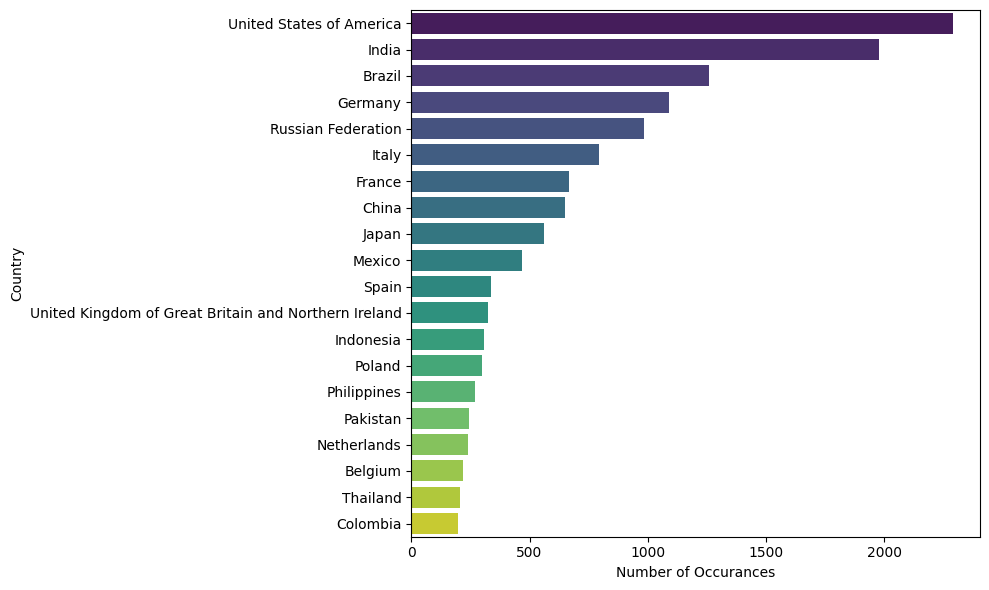

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


for colons_num in is_col_discreet:
    if len(df_train_air[colons_num]) == len(df_train_air[colons_num].dropna()):
        continue

    top_countries = df_train_air[colons_num].value_counts().head(20) 

    top_countries_df = top_countries.reset_index()
    top_countries_df.columns = [colons_num, 'Count']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_countries_df, x='Count', y=colons_num, hue=colons_num, palette='viridis', legend=False)
    plt.xlabel("Number of Occurances")
    plt.ylabel(colons_num)
    plt.tight_layout()
    plt.show()

CO_Category
Good    4240
Name: count, dtype: int64


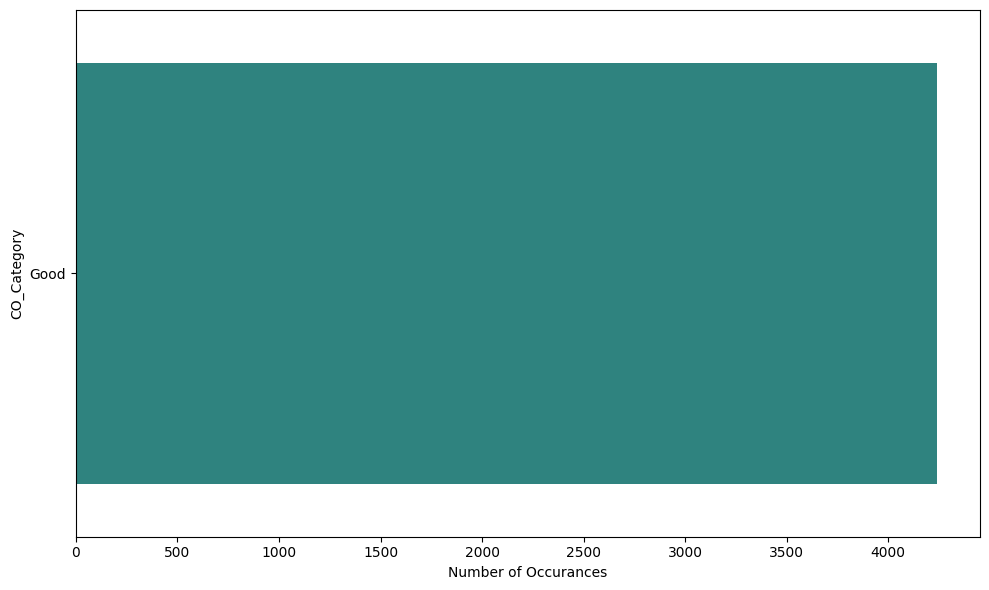

Ozone_Category
Good                              4227
Moderate                           287
Unhealthy for Sensitive Groups      91
Unhealthy                           81
Very Unhealthy                       7
Name: count, dtype: int64


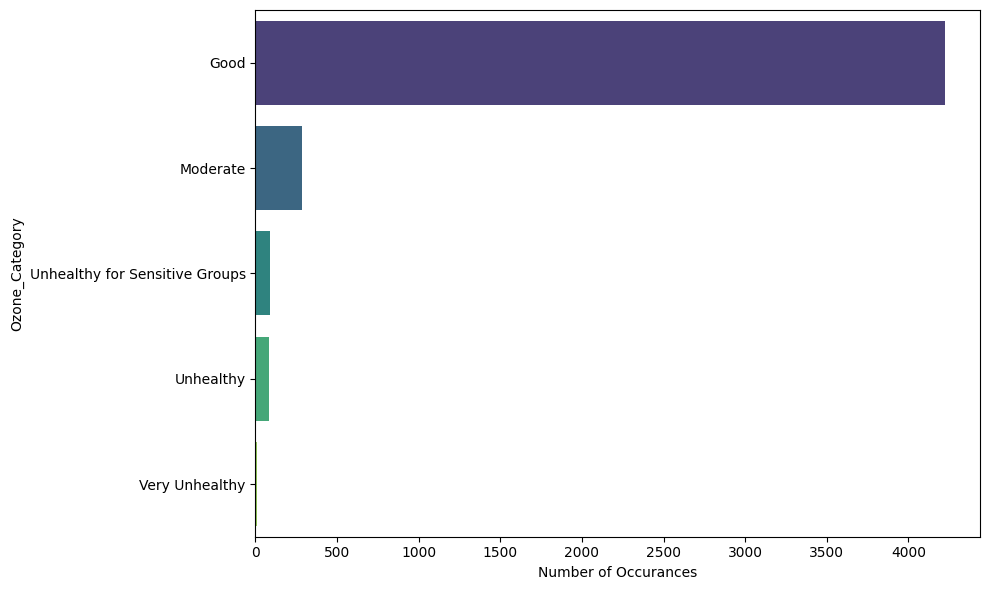

NO2_Category
Good        4692
Moderate       1
Name: count, dtype: int64


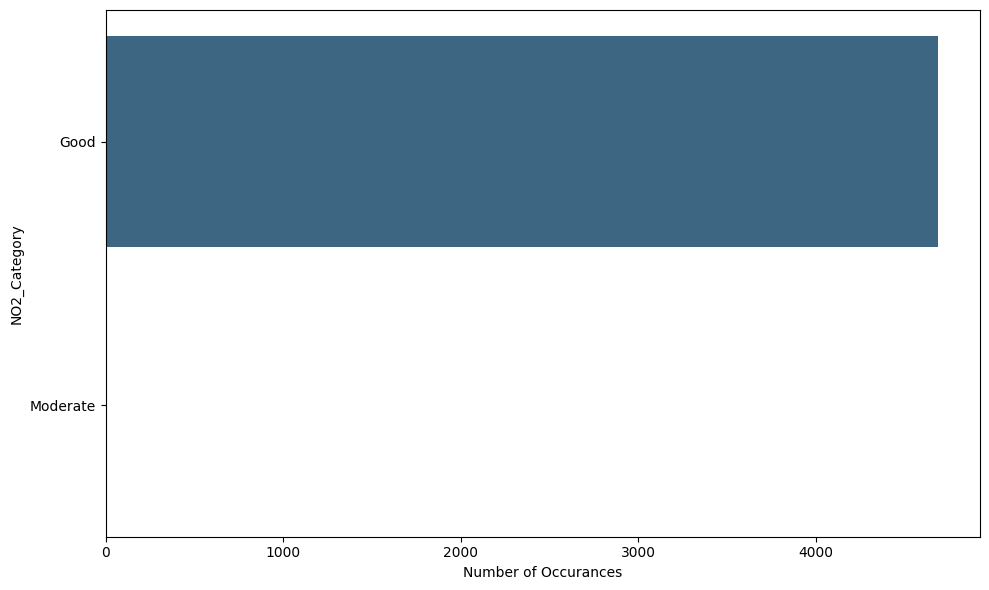

PM25_Category
L0    2045
L1    1811
L3     426
L2     322
L4      58
L5      31
Name: count, dtype: int64


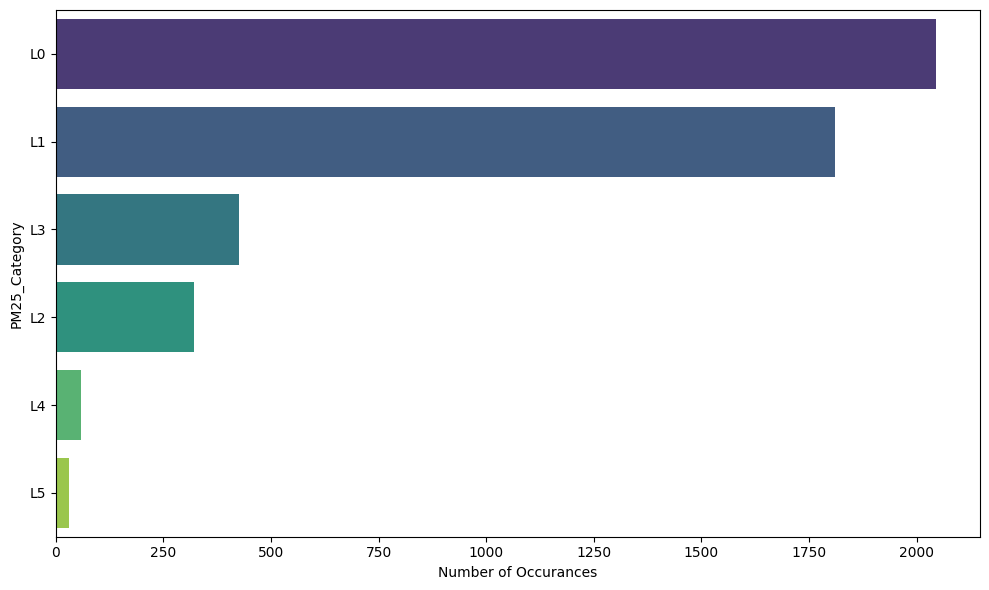

Emissions
L0    2045
L1    1811
L3     426
L2     322
L4      58
L5      31
Name: count, dtype: int64


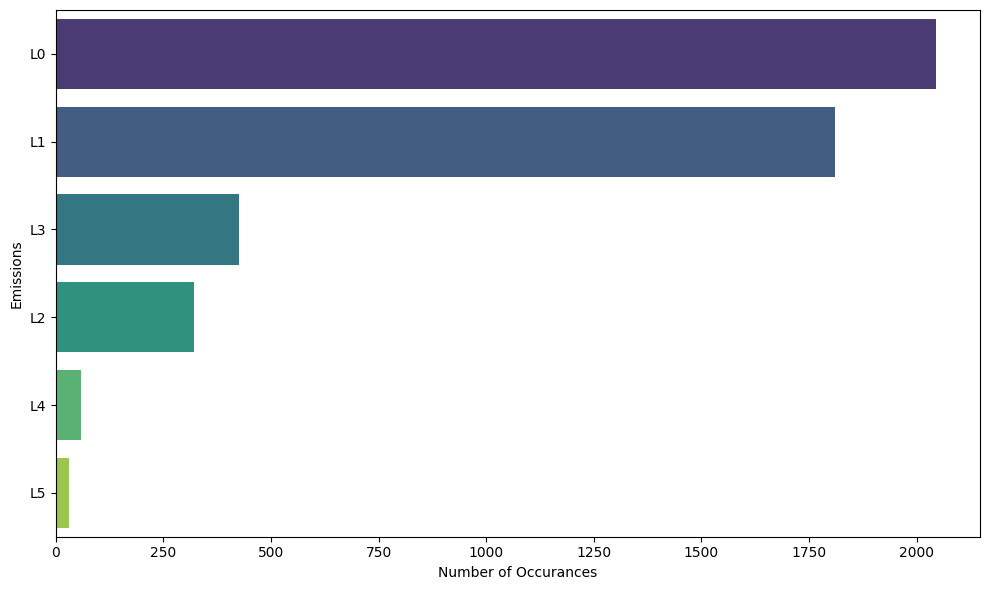

AQI_Category
Good                              1987
Moderate                          1846
Unhealthy                          446
Unhealthy for Sensitive Groups     318
Very Unhealthy                      58
Hazardous                           38
Name: count, dtype: int64


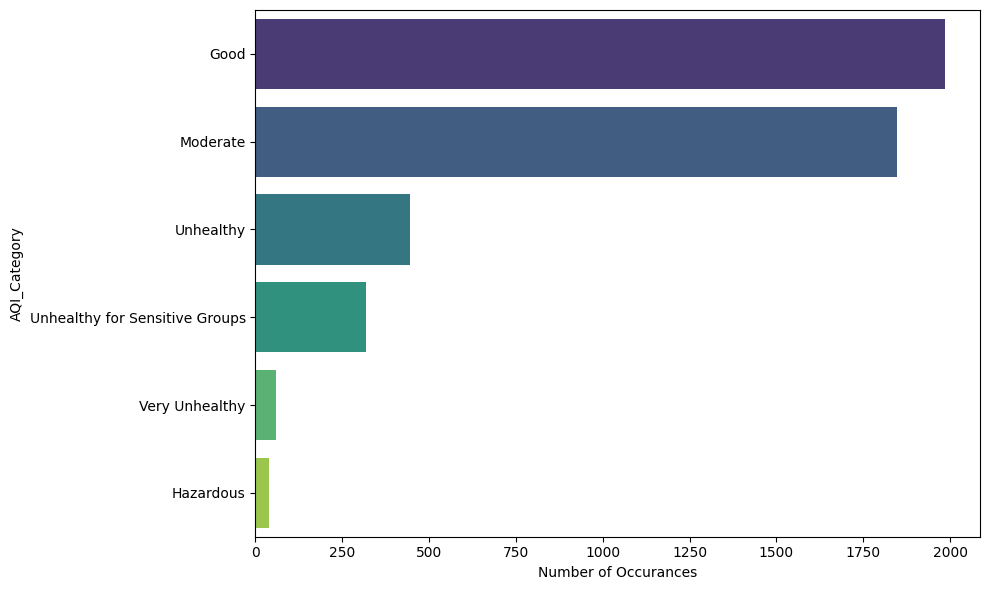

In [11]:
for colons_num in is_col_ordinal:
  

    top_countries = df_test_air[colons_num].value_counts()
    print(top_countries)

    top_countries_df = top_countries.reset_index()
    top_countries_df.columns = [colons_num, 'Count']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_countries_df, x='Count', y=colons_num, hue=colons_num, palette='viridis', legend=False)
    plt.xlabel("Number of Occurances")
    plt.ylabel(colons_num)
    plt.tight_layout()
    plt.show()

In [12]:
df_numeric_air = pd.DataFrame(df_train_air, columns=is_col_numeric)
matrix_corr = df_numeric_air.corr()
elements_correlated = {}


associated_elements_with_index = {}
for idx, core_columns in enumerate(df_numeric_air.columns):
    associated_elements_with_index[core_columns] = idx


for core_columns in matrix_corr.columns:
    for row in matrix_corr.index:
        value = matrix_corr.loc[row, core_columns]
        if row not in elements_correlated.keys():
            elements_correlated[row] = []
        if value > 0.80 and core_columns!=row:
            elements_correlated[core_columns].append(row)
            


In [13]:
df_train_air_filtered = df_train_air.copy()
elements_to_be_eliminated = []
for keys_elements in elements_correlated.keys():

    if elements_correlated[keys_elements] == [] or keys_elements in elements_to_be_eliminated:
        continue
    max_num_elements = np.max([len(elements_correlated[x]) for x in elements_correlated[keys_elements]])

    if max_num_elements > len(elements_correlated[keys_elements]):
        max_num_elements = len(elements_correlated[keys_elements])

    copy_elements_correlated = elements_correlated[keys_elements].copy()
    copy_elements_correlated.append(keys_elements)
    copy_elements_correlated_filter = list(filter(lambda x:len(elements_correlated[x])==max_num_elements,copy_elements_correlated))
    copy_elements_correlated_to_be_eliminated = copy_elements_correlated_filter.copy()

    if len(copy_elements_correlated_filter) != list():
        if elements_correlated[keys_elements] == []:
            continue
        max_num_elements = np.max([num_examples_without_empty_values[associated_elements_with_index[x]] for x in elements_correlated[keys_elements]])
        if max_num_elements > num_examples_without_empty_values[associated_elements_with_index[keys_elements]]:
            max_num_elements = num_examples_without_empty_values[associated_elements_with_index[keys_elements]]

        copy_elements_correlated = elements_correlated[keys_elements].copy()
        copy_elements_correlated.append(keys_elements)
        copy_elements_correlated_filter = list(filter(lambda x:num_examples_without_empty_values[associated_elements_with_index[x]]==max_num_elements,copy_elements_correlated))
    

    if len(copy_elements_correlated_filter) != list():
        copy_elements_correlated_filter = copy_elements_correlated_filter[-1:]
    
    if copy_elements_correlated_filter != list():
        copy_elements_correlated_to_be_eliminated.remove(copy_elements_correlated_filter[0])
        elements_to_be_eliminated.extend(copy_elements_correlated_to_be_eliminated)


In [14]:
target_column_AIR = "AQI_Category"

In [15]:
from scipy.stats import chi2_contingency
df_ordinal_air = pd.DataFrame(df_train_air, columns=is_col_ordinal)
our_pairs = set()
elements_correlated_ordinal = {}

associated_elements_with_index = {}
for idx, core_columns in enumerate(df_ordinal_air.columns):
    associated_elements_with_index[core_columns] = idx


for columns in df_ordinal_air.columns:
    frequency_per_element = []

    
    for new_columns in df_ordinal_air.columns:
        if columns == new_columns or (new_columns, columns) in our_pairs:
                continue
        our_elements_list = []
        for index, values in enumerate(df_ordinal_air[columns].dropna().unique()):
            our_element = []
            indices = df_ordinal_air[df_ordinal_air[columns] == values].index.to_list()
        
        

            elements = {}
            
            for idx in indices:
                if df_ordinal_air.at[idx, new_columns] not in elements.keys():
                    elements[df_ordinal_air.at[idx, new_columns]] = 1
                else:
                    elements[df_ordinal_air.at[idx, new_columns]]+=1
            
            for values_opp in df_ordinal_air[new_columns].dropna().unique():
                if values_opp in elements.keys():
                    our_element.append(elements[values_opp])
                else:
                    our_element.append(0)
            our_elements_list.append(our_element)
        chi2, p, dof, expected = chi2_contingency(our_elements_list)

        if p >= 1 and new_columns != target_column_AIR and columns != target_column_AIR:
            our_pairs.add((columns, new_columns))
            if columns not in elements_correlated_ordinal:
                elements_correlated_ordinal[columns] = []
            if new_columns not in elements_correlated_ordinal:
                elements_correlated_ordinal[new_columns] = []
            elements_correlated_ordinal[columns].append(new_columns)
            elements_correlated_ordinal[new_columns].append(columns)
               

    

In [16]:
for keys_elements in elements_correlated_ordinal.keys():

    if elements_correlated_ordinal[keys_elements] == [] or keys_elements in elements_to_be_eliminated:
        continue
    max_num_elements = np.max([len(elements_correlated_ordinal[x]) for x in elements_correlated_ordinal[keys_elements]])

    if max_num_elements > len(elements_correlated_ordinal[keys_elements]):
        max_num_elements = len(elements_correlated_ordinal[keys_elements])

    copy_elements_correlated = elements_correlated_ordinal[keys_elements].copy()
    copy_elements_correlated.append(keys_elements)
    copy_elements_correlated_filter = list(filter(lambda x:len(elements_correlated_ordinal[x])==max_num_elements,copy_elements_correlated))
    copy_elements_correlated_to_be_eliminated = copy_elements_correlated_filter.copy()

    if len(copy_elements_correlated_filter) != list():
        if elements_correlated_ordinal[keys_elements] == []:
            continue
        max_num_elements = np.max([num_examples_without_empty_values[associated_elements_with_index[x]] for x in elements_correlated_ordinal[keys_elements]])
        if max_num_elements > num_examples_without_empty_values[associated_elements_with_index[keys_elements]]:
            max_num_elements = num_examples_without_empty_values[associated_elements_with_index[keys_elements]]

        copy_elements_correlated = elements_correlated_ordinal[keys_elements].copy()
        copy_elements_correlated.append(keys_elements)
        copy_elements_correlated_filter = list(filter(lambda x:num_examples_without_empty_values[associated_elements_with_index[x]]==max_num_elements,copy_elements_correlated))
    

    if len(copy_elements_correlated_filter) != list():
        copy_elements_correlated_filter = copy_elements_correlated_filter[-1:]
    
    if copy_elements_correlated_filter != list():
        copy_elements_correlated_to_be_eliminated.remove(copy_elements_correlated_filter[0])
        elements_to_be_eliminated.extend(copy_elements_correlated_to_be_eliminated)

In [17]:

outliers_list = []

for index in range(len(l_25th_percentile_val)):
    outliers = df_train_air[(df_train_air[df_numeric_air.columns[index]] < l_25th_percentile_val[index]) | (df_train_air[df_numeric_air.columns[index]] > l_75th_percentile_val[index])]
    outliers_current = outliers[df_numeric_air.columns[index]].unique()
    if l_25th_percentile_val[index] == l_75th_percentile_val[index]:
        outliers_current = outliers[df_numeric_air.columns[index]].unique()
        outliers_current = list(filter(lambda x: len(outliers[outliers[df_numeric_air.columns[index]] == x]) < 30 , outliers_current))
        outliers_current = list(map(lambda x: int(x), outliers_current))
    outliers_list.append(outliers_current)
        


In [18]:
from sklearn.metrics import roc_auc_score
pair_numeric_ordinal = {}
value_cat = {}
for columns_num in is_col_numeric:
    col_numeric_max = ""
    numeric_val = -1
    for columns_1 in is_col_ordinal:
        df_train_air_filtered2 = df_train_air_filtered.copy().dropna(how='any', axis=0, subset=[columns_num, columns_1])
        if len(df_train_air_filtered2[columns_1].unique()) == 1:
            continue
        for value in df_train_air_filtered2[columns_1].unique():
            df_train_air_filtered2["is_moderate"] = (df_train_air_filtered2[columns_1] == value).astype(int)
            df_train_air_filtered23 = df_train_air_filtered2[df_train_air_filtered2[columns_1] == value]

            
            roc = roc_auc_score(df_train_air_filtered2["is_moderate"], df_train_air_filtered2[columns_num])
            if roc != roc:
                continue
            if roc >= 0.95 and roc >numeric_val :
                numeric_val = roc
                col_numeric_max = columns_1
        
    if col_numeric_max != "" and col_numeric_max!="":
        pair_numeric_ordinal[columns_num] = col_numeric_max

        if col_numeric_max not in pair_numeric_ordinal.keys() or numeric_val > value_cat[col_numeric_max]:
            value_cat[col_numeric_max] = numeric_val
            pair_numeric_ordinal[col_numeric_max] = columns_num


In [19]:
temp_df_all = df_train_air_filtered.copy()
temp_df_all_back = df_train_air_filtered.copy()
df_test_air_filtered = df_test_air.copy()


for idx2, colons_ord in enumerate(is_col_ordinal):
    if len(df_train_air_filtered[colons_ord].copy().dropna()) != len(df_train_air_filtered[colons_ord]):
        list_correlated_values = elements_correlated_ordinal[colons_ord]

        for idx, it in enumerate(df_train_air_filtered[colons_ord].isna()): 
            if it:
                list_correlated_values_filter = list(filter(lambda x: df_train_air_filtered.at[idx, x] == df_train_air_filtered.at[idx, x], list_correlated_values))
                if list_correlated_values_filter != []:
                    our_col = list_correlated_values_filter[0]
                    df_train_air_filtered.at[idx, colons_ord] = df_train_air_filtered.at[idx, our_col]
                else:
                   
                    df_train_air_filtered.drop(idx,axis=0,inplace=True) 
    if len(df_test_air_filtered[colons_ord].copy().dropna()) != len(df_test_air_filtered[colons_ord]):
        list_correlated_values = elements_correlated_ordinal[colons_ord]

        for idx, it in enumerate(df_test_air_filtered[colons_ord].isna()): 
            if it:
                list_correlated_values_filter = list(filter(lambda x: df_test_air_filtered.at[idx, x] == df_test_air_filtered.at[idx, x], list_correlated_values))
                if list_correlated_values_filter != []:
                    our_col = list_correlated_values_filter[0]
                    df_test_air_filtered.at[idx, colons_ord] = df_test_air_filtered.at[idx, our_col]
                else:
                   
                    df_test_air_filtered.drop(idx,axis=0,inplace=True) 



In [20]:
df_train_air_filtered2 = df_train_air_filtered.copy()
df_test_air_filtered2 = df_test_air_filtered.copy()

for idx2, colons_ord in enumerate(is_col_discreet):
    
   if len(df_train_air_filtered[colons_ord].copy().dropna()) != len(df_train_air_filtered[colons_ord]):
       for idx, _ in df_train_air_filtered.iterrows():
          if df_train_air_filtered.at[idx, colons_ord] != df_train_air_filtered.at[idx, colons_ord]:
            df_train_air_filtered2.drop(idx,axis=0,inplace=True) 
   if len(df_test_air_filtered[colons_ord].copy().dropna()) != len(df_test_air_filtered[colons_ord]):
       for idx, _ in df_test_air_filtered.iterrows():
          if df_test_air_filtered.at[idx, colons_ord] != df_test_air_filtered.at[idx, colons_ord]:
            df_test_air_filtered2.drop(idx,axis=0,inplace=True) 
df_train_air_filtered = df_train_air_filtered2.copy()
df_test_air_filtered = df_test_air_filtered2.copy()

In [21]:
from sklearn.impute import KNNImputer
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer


for idx2, colons_num in enumerate(is_col_numeric):
    
    if len(df_train_air_filtered[colons_num].copy().dropna()) != len(df_train_air_filtered[colons_num]):
        list_correlated_values = elements_correlated[colons_num]

        if list_correlated_values != []:
            num_cols = [list_correlated_values]
            imputer = KNNImputer(n_neighbors=5)
            df_train_air_filtered[num_cols] = imputer.fit_transform(df_train_air_filtered[num_cols])
        else:
            list_colons_ord = []
            list_index_ord = []
            df_train_air_filtered_copy = df_train_air_filtered.copy().dropna(how='any', axis=0, subset=[colons_num])
            list_float_values = list(df_train_air_filtered_copy[colons_num])
            list_float_values = list(filter(lambda x: int(x)!=float(x), list_float_values))

            is_float_or_not =  list_float_values != []
            correlated_index_with_category = pair_numeric_ordinal[colons_num]

            for idx, _ in df_train_air_filtered.iterrows():
                if df_train_air_filtered.at[idx, colons_num] != df_train_air_filtered.at[idx, colons_num]:
                    df_new_filter = df_train_air_filtered[df_train_air_filtered[correlated_index_with_category]==df_train_air_filtered.at[idx, correlated_index_with_category]].copy().dropna(how='any', axis=0, subset=[colons_num])
                    skew_value =df_new_filter[colons_num].skew()
                    if skew_value > 0.5 or skew_value < -0.5:
                        Q1 = df_new_filter[colons_num].quantile(0.5)
                        if not is_float_or_not:
                            Q1 = int(Q1)
                        
                        df_train_air_filtered.at[idx, colons_num] = Q1
                    else:
                        
                        mean_val = np.mean(df_new_filter[colons_num])
                        if not is_float_or_not:
                            mean_val = int(mean_val)
                        
                        df_train_air_filtered.at[idx, colons_num] = mean_val
                   

                elif not is_float_or_not:
                    df_train_air_filtered.at[idx, colons_num] = df_train_air_filtered_copy.at[idx, colons_num]
            if not is_float_or_not:
                df_train_air_filtered[colons_num] = df_train_air_filtered.apply(lambda x: int(x[colons_num]), axis=1)
    
    
    if len(df_test_air_filtered[colons_num].copy().dropna()) != len(df_test_air_filtered[colons_num]):
        list_correlated_values = elements_correlated[colons_num]

        if list_correlated_values != []:
            num_cols = [list_correlated_values]
            imputer = KNNImputer(n_neighbors=5)
            df_test_air_filtered[num_cols] = imputer.fit_transform(df_test_air_filtered[num_cols])
        else:
            list_colons_ord = []
            list_index_ord = []
            df_train_air_filtered_copy = df_test_air_filtered.copy().dropna(how='any', axis=0, subset=[colons_num])
            list_float_values = list(df_train_air_filtered_copy[colons_num])
            list_float_values = list(filter(lambda x: int(x)!=float(x), list_float_values))

            is_float_or_not =  list_float_values != []
            correlated_index_with_category = pair_numeric_ordinal[colons_num]

            for idx, _ in df_test_air_filtered.iterrows():
                if df_test_air_filtered.at[idx, colons_num] != df_test_air_filtered.at[idx, colons_num]:
                    df_new_filter = df_test_air_filtered[df_test_air_filtered[correlated_index_with_category]==df_test_air_filtered.at[idx, correlated_index_with_category]].copy().dropna(how='any', axis=0, subset=[colons_num])
                    skew_value =df_new_filter[colons_num].skew()
                    if skew_value > 0.5 or skew_value < -0.5:
                        Q1 = df_new_filter[colons_num].quantile(0.5)
                        if not is_float_or_not:
                            Q1 = int(Q1)
                        
                        df_test_air_filtered.at[idx, colons_num] = Q1
                    else:
                        
                        mean_val = np.mean(df_new_filter[colons_num])
                        if not is_float_or_not:
                            mean_val = int(mean_val)
                        
                        df_test_air_filtered.at[idx, colons_num] = mean_val
                   

                elif not is_float_or_not:
                    df_test_air_filtered.at[idx, colons_num] = df_train_air_filtered_copy.at[idx, colons_num]
            if not is_float_or_not:
                df_test_air_filtered[colons_num] = df_test_air_filtered.apply(lambda x: int(x[colons_num]), axis=1)


In [22]:
length_elements = len(df_train_air_filtered)
for columns_el in is_col_numeric:
    Q1 = df_train_air_filtered[columns_el].quantile(0.25)
    Q3 = df_train_air_filtered[columns_el].quantile(0.75)
    median_ = df_train_air_filtered[columns_el].quantile(0.5)

    ratio_number_val_per_unique = length_elements/len(df_train_air_filtered[columns_el].unique())
    mean = np.mean(list(df_train_air_filtered[columns_el])) 
    std_dev = np.std(list(df_train_air_filtered[columns_el]))

    
    current_outliers = df_train_air_filtered.copy()
    if ratio_number_val_per_unique < 100:
        Q1 = df_train_air_filtered[columns_el].quantile(0.005)
        Q3 = df_train_air_filtered[columns_el].quantile(0.995)
    elif ratio_number_val_per_unique < 1000:
        Q1 = df_train_air_filtered[columns_el].quantile(0.1)
        Q3 = df_train_air_filtered[columns_el].quantile(0.9)
    
    outliers_curr = df_train_air_filtered.copy()
    outliers_curr_Q3 = outliers_curr[(outliers_curr[columns_el]>Q3)]
    outliers_curr_Q1 = outliers_curr[(outliers_curr[columns_el]<Q1)]



    lst_rev = list(outliers_curr[columns_el].unique())
    lst_rev.sort(reverse=True)
    lst_rev = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q3 = list(outliers_curr_Q3[columns_el].unique())
    lst_rev_Q3.sort(reverse=True)
    lst_rev_A3 = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q1 = list(outliers_curr_Q1[columns_el].unique())
    lst_rev_Q1.sort(reverse=True)
    lst_rev_Q1 = list(map(lambda x: float(x), lst_rev_Q1))

    outliers = []
    for i in range(len(lst_rev)-1):
        if (lst_rev[i]-lst_rev[i+1] > 10 and (lst_rev[i]-lst_rev[i+1])/(lst_rev[0]-lst_rev[-1])>0.25) or ((lst_rev[i] in lst_rev_Q3 or lst_rev[i+1] in lst_rev_Q3) and (lst_rev[i] in lst_rev_Q1 or lst_rev[i+1] in lst_rev_Q1)):
            if lst_rev[i] in lst_rev_Q3:
                outliers.append(lst_rev[i])
            elif lst_rev[i+1] in lst_rev_Q1:
                outliers.append(lst_rev[i+1])
    if outliers != []:
        out_z = []
        for out in outliers:
            df_train_air_filtered[columns_el] = df_train_air_filtered[columns_el].replace(out, np.nan)

In [23]:
length_elements = len(df_test_air_filtered)
for columns_el in is_col_numeric:
    Q1 = df_test_air_filtered[columns_el].quantile(0.25)
    Q3 = df_test_air_filtered[columns_el].quantile(0.75)
    median_ = df_test_air_filtered[columns_el].quantile(0.5)

    ratio_number_val_per_unique = length_elements/len(df_test_air_filtered[columns_el].unique())
    mean = np.mean(list(df_test_air_filtered[columns_el])) 
    std_dev = np.std(list(df_test_air_filtered[columns_el]))

    
    current_outliers = df_test_air_filtered.copy()
    if ratio_number_val_per_unique < 100:
        Q1 = df_test_air_filtered[columns_el].quantile(0.005)
        Q3 = df_test_air_filtered[columns_el].quantile(0.995)
    elif ratio_number_val_per_unique < 1000:
        Q1 = df_test_air_filtered[columns_el].quantile(0.1)
        Q3 = df_test_air_filtered[columns_el].quantile(0.9)
    
    outliers_curr = df_test_air_filtered.copy()
    outliers_curr_Q3 = outliers_curr[(outliers_curr[columns_el]>Q3)]
    outliers_curr_Q1 = outliers_curr[(outliers_curr[columns_el]<Q1)]



    lst_rev = list(outliers_curr[columns_el].unique())
    lst_rev.sort(reverse=True)
    lst_rev = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q3 = list(outliers_curr_Q3[columns_el].unique())
    lst_rev_Q3.sort(reverse=True)
    lst_rev_A3 = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q1 = list(outliers_curr_Q1[columns_el].unique())
    lst_rev_Q1.sort(reverse=True)
    lst_rev_Q1 = list(map(lambda x: float(x), lst_rev_Q1))

    outliers = []
    for i in range(len(lst_rev)-1):
        if (lst_rev[i]-lst_rev[i+1] > 10 and (lst_rev[i]-lst_rev[i+1])/(lst_rev[0]-lst_rev[-1])>0.25) or ((lst_rev[i] in lst_rev_Q3 or lst_rev[i+1] in lst_rev_Q3) and (lst_rev[i] in lst_rev_Q1 or lst_rev[i+1] in lst_rev_Q1)):
            if lst_rev[i] in lst_rev_Q3:
                outliers.append(lst_rev[i])
            elif lst_rev[i+1] in lst_rev_Q1:
                outliers.append(lst_rev[i+1])
    if outliers != []:
        out_z = []
        for out in outliers:
            df_test_air_filtered[columns_el] = df_test_air_filtered[columns_el].replace(out, np.nan)

In [24]:
from sklearn.impute import KNNImputer
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer


for idx2, colons_num in enumerate(is_col_numeric):
    
    if len(df_train_air_filtered[colons_num].copy().dropna()) != len(df_train_air_filtered[colons_num]):
        list_correlated_values = elements_correlated[colons_num]

        if list_correlated_values != []:
            num_cols = [list_correlated_values]
            imputer = KNNImputer(n_neighbors=5)
            df_train_air_filtered[num_cols] = imputer.fit_transform(df_train_air_filtered[num_cols])
        else:
            list_colons_ord = []
            list_index_ord = []
            df_train_air_filtered_copy = df_train_air_filtered.copy().dropna(how='any', axis=0, subset=[colons_num])
            list_float_values = list(df_train_air_filtered_copy[colons_num])
            list_float_values = list(filter(lambda x: int(x)!=float(x), list_float_values))

            is_float_or_not =  list_float_values != []
            correlated_index_with_category = pair_numeric_ordinal[colons_num]

            for idx, _ in df_train_air_filtered.iterrows():
                if df_train_air_filtered.at[idx, colons_num] != df_train_air_filtered.at[idx, colons_num]:
                    df_new_filter = df_train_air_filtered[df_train_air_filtered[correlated_index_with_category]==df_train_air_filtered.at[idx, correlated_index_with_category]].copy().dropna(how='any', axis=0, subset=[colons_num])
                    skew_value =df_new_filter[colons_num].skew()
                    if skew_value > 0.5 or skew_value < -0.5:
                        Q1 = df_new_filter[colons_num].quantile(0.5)
                        if not is_float_or_not:
                            Q1 = int(Q1)
                        
                        df_train_air_filtered.at[idx, colons_num] = Q1
                    else:
                        
                        mean_val = np.mean(df_new_filter[colons_num])
                        if not is_float_or_not:
                            mean_val = int(mean_val)
                        
                        df_train_air_filtered.at[idx, colons_num] = mean_val
                   

                elif not is_float_or_not:
                    df_train_air_filtered.at[idx, colons_num] = df_train_air_filtered_copy.at[idx, colons_num]
            if not is_float_or_not:
                df_train_air_filtered[colons_num] = df_train_air_filtered.apply(lambda x: int(x[colons_num]), axis=1)

    if len(df_test_air_filtered[colons_num].copy().dropna()) != len(df_test_air_filtered[colons_num]):
        list_correlated_values = elements_correlated[colons_num]

        if list_correlated_values != []:
            num_cols = [list_correlated_values]
            imputer = KNNImputer(n_neighbors=5)
            df_test_air_filtered[num_cols] = imputer.fit_transform(df_test_air_filtered[num_cols])
        else:
            list_colons_ord = []
            list_index_ord = []
            df_train_air_filtered_copy = df_test_air_filtered.copy().dropna(how='any', axis=0, subset=[colons_num])
            list_float_values = list(df_train_air_filtered_copy[colons_num])
            list_float_values = list(filter(lambda x: int(x)!=float(x), list_float_values))

            is_float_or_not =  list_float_values != []
            correlated_index_with_category = pair_numeric_ordinal[colons_num]

            for idx, _ in df_test_air_filtered.iterrows():
                if df_test_air_filtered.at[idx, colons_num] != df_test_air_filtered.at[idx, colons_num]:
                    df_new_filter = df_test_air_filtered[df_test_air_filtered[correlated_index_with_category]==df_test_air_filtered.at[idx, correlated_index_with_category]].copy().dropna(how='any', axis=0, subset=[colons_num])
                    skew_value =df_new_filter[colons_num].skew()
                    if skew_value > 0.5 or skew_value < -0.5:
                        Q1 = df_new_filter[colons_num].quantile(0.5)
                        if not is_float_or_not:
                            Q1 = int(Q1)
                        
                        df_test_air_filtered.at[idx, colons_num] = Q1
                    else:
                        
                        mean_val = np.mean(df_new_filter[colons_num])
                        if not is_float_or_not:
                            mean_val = int(mean_val)
                        
                        df_test_air_filtered.at[idx, colons_num] = mean_val
                   

                elif not is_float_or_not:
                    df_test_air_filtered.at[idx, colons_num] = df_train_air_filtered_copy.at[idx, colons_num]
            if not is_float_or_not:
                df_test_air_filtered[colons_num] = df_test_air_filtered.apply(lambda x: int(x[colons_num]), axis=1)


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

is_col_ordinal_filter = list(filter(lambda x: x in df_train_air_filtered.columns, is_col_ordinal))

categorical_columns = is_col_ordinal_filter
encoder = LabelEncoder()
df_train_air_filtered_converted_label = df_train_air_filtered.copy()
for idx, columns_ordinal in enumerate(is_col_ordinal):
    list_values = encoder.fit_transform(df_train_air_filtered[columns_ordinal])
    df_train_air_filtered['num_cat'] = list_values
    
    list_values_unique = encoder.fit_transform(df_train_air_filtered[columns_ordinal].unique())

    asociate_number_with_val = []
   
    list_cat = df_train_air_filtered[columns_ordinal].unique()

    
    pair_mean_with_val = []
    for idx2, values in enumerate(df_train_air_filtered[columns_ordinal].unique()):
        asociate_number_with_val.append((int(list_values_unique[idx2]), values))
        df_train_air_filtered_cp = df_train_air_filtered.copy()
        df_train_air_filtered_cp = df_train_air_filtered_cp[df_train_air_filtered_cp[columns_ordinal]==values]

        if columns_ordinal in pair_numeric_ordinal.keys():
            pair_mean_with_val.append((float(np.mean(df_train_air_filtered_cp[pair_numeric_ordinal[columns_ordinal]])), values))
    pair_mean_with_val.sort()
    asociate_number_with_val.sort()

    val_index = 0
    pair_order_element = []
    for idx, our_pair in enumerate(pair_mean_with_val):
        pair_order_element.append((idx, our_pair[1]))


    if pair_order_element != asociate_number_with_val and pair_order_element!=[]:
        asociate_number_with_val = pair_order_element

    for pa in asociate_number_with_val:
        df_train_air_filtered_1 = df_train_air_filtered[df_train_air_filtered[columns_ordinal]==pa[1]]
        df_train_air_filtered_1.loc[:, 'num_cat'] = pa[0]
        for idx, _ in df_train_air_filtered_1.iterrows():
            df_train_air_filtered_converted_label.at[idx, columns_ordinal] = df_train_air_filtered_1.at[idx, 'num_cat']    
    

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

is_col_ordinal_filter = list(filter(lambda x: x in df_test_air_filtered.columns, is_col_ordinal))

categorical_columns = is_col_ordinal_filter
encoder = LabelEncoder()
df_test_air_filtered_converted_label = df_test_air_filtered.copy()
for idx, columns_ordinal in enumerate(is_col_ordinal):
    list_values = encoder.fit_transform(df_test_air_filtered[columns_ordinal])
    df_test_air_filtered['num_cat'] = list_values
    
    list_values_unique = encoder.fit_transform(df_test_air_filtered[columns_ordinal].unique())

    asociate_number_with_val = []
   
    list_cat = df_test_air_filtered[columns_ordinal].unique()

    
    pair_mean_with_val = []
    for idx2, values in enumerate(df_train_air_filtered[columns_ordinal].unique()):
        asociate_number_with_val.append((int(list_values_unique[idx2]), values))
        df_test_air_filtered_cp = df_test_air_filtered.copy()
        df_test_air_filtered_cp = df_test_air_filtered_cp[df_test_air_filtered_cp[columns_ordinal]==values]

        if columns_ordinal in pair_numeric_ordinal.keys():
            pair_mean_with_val.append((float(np.mean(df_test_air_filtered_cp[pair_numeric_ordinal[columns_ordinal]])), values))
    pair_mean_with_val.sort()
    asociate_number_with_val.sort()

    val_index = 0
    pair_order_element = []
    for idx, our_pair in enumerate(pair_mean_with_val):
        pair_order_element.append((idx, our_pair[1]))


    if pair_order_element != asociate_number_with_val and pair_order_element!=[]:
        asociate_number_with_val = pair_order_element
    for pa in asociate_number_with_val:
        df_test_air_filtered_1 = df_test_air_filtered[df_test_air_filtered[columns_ordinal]==pa[1]]
        df_test_air_filtered_1.loc[:, 'num_cat'] = pa[0]
        for idx, _ in df_test_air_filtered_1.iterrows():
            df_test_air_filtered_converted_label.at[idx, columns_ordinal] = df_test_air_filtered_1.at[idx, 'num_cat']    
    

In [27]:
df_train_air_filtered = df_train_air_filtered.drop(list(set(elements_to_be_eliminated)), axis=1)
df_test_air_filtered = df_test_air_filtered.drop(list(set(elements_to_be_eliminated)), axis=1)

df_train_air_filtered_converted_label = df_train_air_filtered_converted_label.drop(list(set(elements_to_be_eliminated)), axis=1)
df_test_air_filtered_converted_label = df_test_air_filtered_converted_label.drop(list(set(elements_to_be_eliminated)), axis=1)

In [28]:
from sklearn.metrics import roc_auc_score
pair_numeric_ordinal2 = {}

value_cat = {}
for columns_num in is_col_numeric:


    if columns_num not in df_train_air_filtered.columns:
        continue
    col_numeric_max = ""
    numeric_val = -1
    for columns_1 in is_col_ordinal:
        if columns_1 not in df_train_air_filtered.columns:
            continue
        df_train_air_filtered2 = df_train_air_filtered.copy().dropna(how='any', axis=0, subset=[columns_num, columns_1])
        if len(df_train_air_filtered2[columns_1].unique()) == 1:
            continue
        
        for value in df_train_air_filtered2[columns_1].unique():
            df_train_air_filtered2["is_moderate"] = (df_train_air_filtered2[columns_1] == value).astype(int)
            df_train_air_filtered23 = df_train_air_filtered2[df_train_air_filtered2[columns_1] == value]

            
            roc = roc_auc_score(df_train_air_filtered2["is_moderate"], df_train_air_filtered2[columns_num])
            if roc != roc:
                continue
            if roc >= 0.95 and roc > numeric_val :
                numeric_val = roc
                col_numeric_max = columns_1
                
        
    if col_numeric_max != "" and col_numeric_max!="":
        pair_numeric_ordinal2[columns_num] = col_numeric_max
        if col_numeric_max not in pair_numeric_ordinal2.keys() or numeric_val > value_cat[col_numeric_max]:
            value_cat[col_numeric_max] = numeric_val
            pair_numeric_ordinal2[col_numeric_max] = columns_num

pair_numeric_ordinal2_test = {}

value_cat_test = {}
for columns_num in is_col_numeric:


    if columns_num not in df_test_air_filtered.columns:
        continue
    col_numeric_max = ""
    numeric_val = -1
    for columns_1 in is_col_ordinal:
        if columns_1 not in df_test_air_filtered.columns:
            continue
        df_train_air_filtered2 = df_test_air_filtered.copy().dropna(how='any', axis=0, subset=[columns_num, columns_1])
        if len(df_train_air_filtered2[columns_1].unique()) == 1:
            continue
        
        for value in df_train_air_filtered2[columns_1].unique():
            df_train_air_filtered2["is_moderate"] = (df_train_air_filtered2[columns_1] == value).astype(int)
            df_train_air_filtered23 = df_train_air_filtered2[df_train_air_filtered2[columns_1] == value]

            
            roc = roc_auc_score(df_train_air_filtered2["is_moderate"], df_train_air_filtered2[columns_num])
            if roc != roc:
                continue
            if roc >= 0.95 and roc > numeric_val :
                numeric_val = roc
                col_numeric_max = columns_1
                
        
    if col_numeric_max != "" and col_numeric_max!="":
        pair_numeric_ordinal2_test[columns_num] = col_numeric_max
        if col_numeric_max not in pair_numeric_ordinal2_test.keys() or numeric_val > value_cat[col_numeric_max]:
            value_cat_test[col_numeric_max] = numeric_val
            pair_numeric_ordinal2_test[col_numeric_max] = columns_num
            



In [29]:
target_column_train_air = {'AQI_Category': df_train_air_filtered['AQI_Category']}
df_target_train_air = pd.DataFrame(data=target_column_train_air)

target_column_test_air = {'AQI_Category': df_test_air_filtered['AQI_Category']}
df_target_test_air = pd.DataFrame(data=target_column_test_air)
df_original_target_train_air = df_target_train_air.copy()
df_original_test_train_air = df_target_test_air.copy()


target_column_train_air = {'AQI_Category': df_train_air_filtered_converted_label['AQI_Category']}
df_target_train_air = pd.DataFrame(data=target_column_train_air)

target_column_test_air = {'AQI_Category': df_test_air_filtered_converted_label['AQI_Category']}
df_target_test_air = pd.DataFrame(data=target_column_test_air)

df_test_air_filtered = df_test_air_filtered.drop(['AQI_Category'], axis=1)
df_train_air_filtered = df_train_air_filtered.drop(['AQI_Category'], axis=1)

df_test_air_filtered = df_test_air_filtered_converted_label.drop(['AQI_Category'], axis=1)
df_train_air_filtered = df_train_air_filtered_converted_label.drop(['AQI_Category'], axis=1)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
is_col_numeric_filter = list(filter(lambda x: x in df_train_air_filtered.columns, is_col_numeric))
df_train_air_filtered_2 = df_train_air_filtered.copy()
df_train_air_filtered_2[is_col_numeric_filter] = (scaler.fit_transform(df_train_air_filtered[is_col_numeric_filter]))
df_train_air_filtered = df_train_air_filtered_2.copy()


scaler = StandardScaler()
is_col_numeric_filter_test = list(filter(lambda x: x in df_test_air_filtered.columns, is_col_numeric))
df_test_air_filtered_2 = df_test_air_filtered.copy()
df_test_air_filtered_2[is_col_numeric_filter_test] = (scaler.fit_transform(df_test_air_filtered[is_col_numeric_filter_test]))
df_test_air_filtered = df_test_air_filtered_2.copy()


In [31]:

df_test_air_filtered_converted_label = df_test_air_filtered_converted_label.drop(is_col_discreet, axis=1)
df_train_air_filtered_converted_label = df_train_air_filtered_converted_label.drop(is_col_discreet, axis=1)


In [32]:

df_test_air_filtered = df_test_air_filtered.drop(is_col_discreet, axis=1)
df_train_air_filtered = df_train_air_filtered.drop(is_col_discreet, axis=1)

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10)

X_train = df_train_air_filtered
y_train = df_target_train_air['AQI_Category'].astype(int).squeeze()


clf = clf.fit(X_train,y_train)


X_test = df_test_air_filtered

y_pred = clf.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred)

print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

Acuratețea modelului: 1.0000

Raport clasificare:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1945
           1       1.00      1.00      1.00      1815
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        38

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614


Matrice de confuzie:
[[1945    0    0    0    0    0]
 [   0 1815    0    0    0    0]
 [   0    0  313    0    0    0]
 [   0    0    0  445    0    0]
 [   0    0    0    0   58    0]
 [   0    0    0    0    0   38]]


In [35]:
print(df_train_air_filtered.shape)

(18421, 9)


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10, n_estimators=5, max_samples= 0.8, max_features=0.7)

X_train = df_train_air_filtered
y_train = df_target_train_air['AQI_Category'].astype(int).squeeze()


clf = clf.fit(X_train,y_train)


X_test = df_test_air_filtered

y_pred = clf.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred)

print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

Acuratețea modelului: 1.0000

Raport clasificare:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1945
           1       1.00      1.00      1.00      1815
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        38

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614


Matrice de confuzie:
[[1945    0    0    0    0    0]
 [   0 1815    0    0    0    0]
 [   0    0  313    0    0    0]
 [   0    0    0  445    0    0]
 [   0    0    0    0   58    0]
 [   0    0    0    0    0   38]]


In [38]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
        hidden_layer_sizes=(100, 50),       
        activation='relu',                
        solver='adam',                      
        learning_rate_init=0.002,         
        max_iter=500,                      
        batch_size=64,                      
        alpha=0.0002,                      
        early_stopping=True,                
        validation_fraction=0.5,            
        random_state=42
    )
X_train = df_train_air_filtered
y_train = df_target_train_air['AQI_Category'].astype(int).squeeze()


clf = clf.fit(X_train,y_train)


X_test = df_test_air_filtered

y_pred = clf.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred)

print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(df_target_test_air['AQI_Category'].astype(int).squeeze(), y_pred))

Acuratețea modelului: 0.9998

Raport clasificare:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1945
           1       1.00      1.00      1.00      1815
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       445
           4       1.00      0.98      0.99        58
           5       0.97      1.00      0.99        38

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614


Matrice de confuzie:
[[1945    0    0    0    0    0]
 [   0 1815    0    0    0    0]
 [   0    0  313    0    0    0]
 [   0    0    0  445    0    0]
 [   0    0    0    0   57    1]
 [   0    0    0    0    0   38]]


In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['AQI_Category']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_original_target_train_air[categorical_columns])

one_hot_df_train = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns), dtype=int)




In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['AQI_Category']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded_test = encoder.fit_transform(df_original_test_train_air[categorical_columns])

one_hot_df_test = pd.DataFrame(one_hot_encoded_test, 
                          columns=encoder.get_feature_names_out(categorical_columns), dtype=int)





In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, classification_report


def accuracy(Y, T):
    Y_labels = np.argmax(Y, axis=1)
    T_labels = np.argmax(T, axis=1)
    return np.mean(Y_labels == T_labels)


def softmax(z):
    element_z = z - np.max(z, axis=1, keepdims=True)
    element_z = list(map(lambda x: list(map(lambda y: float(y), x)), element_z))
    e_z = np.exp(element_z) 
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def predict_logistic2(X, W, b):
    return softmax(np.dot(X, W) + b)  # (N, C)

def cross_entropy(Y, T):
    Y = Y / np.sum(Y, axis=1, keepdims=True)
    eps = 1e-15
    return -np.mean(np.sum(np.where(T != 0, np.where(T!=1, T * np.log(Y), 1-eps), eps), axis=1))

def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.01, epochs_no=200):
    N, D = X_train.shape
    C = T_train.shape[1]

    W = np.random.randn(D, C) * lr

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []
    b = np.zeros((1, C))

    for epoch in range(epochs_no):
        Y_train = predict_logistic2(X_train, W, b)
        Y_test = predict_logistic2(X_test, W, b)

        acc_train = accuracy(Y_train, T_train)
        acc_test = accuracy(Y_test, T_test)
        

        train_acc.append(acc_train)
        test_acc.append(acc_test)

        nll_train = cross_entropy(Y_train, T_train)
        nll_test = cross_entropy(Y_test, T_test)
        train_nll.append(nll_train)
        test_nll.append(nll_test)

        grad_W = np.dot(X_train.T, (Y_train - T_train)) / N
        grad_B = np.mean(Y_train - T_train, axis=0, keepdims=True)
        b-=grad_B*lr
        

        grad_W = list(map(lambda x: (list(map(lambda y: lr * float(y), x))), grad_W))
        W -= grad_W
    
    
    y_test = np.argmax(Y_test, axis=1)
    y_pred = np.argmax(T_test, axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_per_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred, zero_division=0)

    return W, train_nll, test_nll, train_acc, test_acc, cm, f1_macro, f1_per_class, report

In [43]:
y_train = one_hot_df_train.values
y_pred = one_hot_df_test.values

X_train = df_train_air_filtered
X_test = df_test_air_filtered
w, train_nll, test_nll, train_acc, test_acc, cm, f1_macro, f1_per_class, report = train_and_eval_logistic(X_train, y_train, X_test, y_pred, 0.1, epochs_no=140)

In [44]:

print("\nRaport clasificare:")
print(report)

print("\nMatrice de confuzie:")
print(cm)



Raport clasificare:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1999
           1       0.00      0.00      0.00         0
           2       0.97      0.82      0.89      2136
           3       0.70      0.65      0.68       479
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.87      4614
   macro avg       0.45      0.41      0.43      4614
weighted avg       0.95      0.87      0.91      4614


Matrice de confuzie:
[[1944    0   55    0    0    0]
 [   0    0    0    0    0    0]
 [   1    0 1756  132  247    0]
 [   0   38    4  313   66   58]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


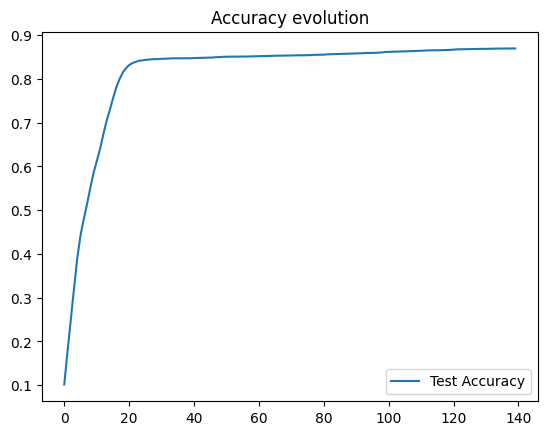

In [45]:
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.title("Accuracy evolution")
plt.show()

In [46]:
print(f"Acuratete finala pe setul train: {train_acc[-1]}")


Acuratete finala pe setul train: 0.8709624884642527
